# Data Analysis & Modelling - Loan Acceptance

In this notebook i'm doing a data analysis and modelling of loan acceptance data.

Data from https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

## Loading data

First i'm loading the dataset and giving a high level overview

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/loans-data.csv', index_col=0)

In [2]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 12)

In [4]:
df.fillna(df.mean(), inplace=True)

## Data Exploration

In the next sections i'm exploring the dataset a bit, look at values and relations of the variables in the data.

## Dependents

Let's have a look at the variable *Dependents* and it's relation with loan acceptance

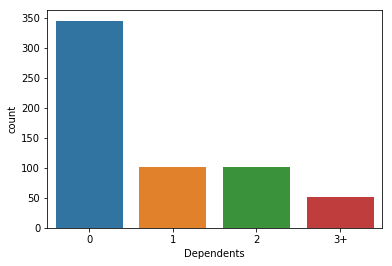

In [11]:
import seaborn as sns

%matplotlib inline

_ = sns.countplot(x=df['Dependents'])

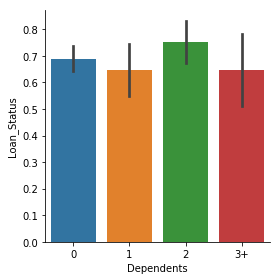

In [12]:
_ = sns.factorplot(x="Dependents", y="Loan_Status", data=df, kind='bar')

## Gender

Second thing i'm curious about is gender. Would (fe-)males get accepted easier for a loan?

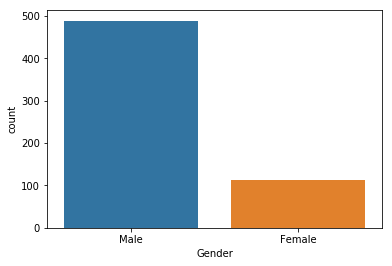

In [13]:
_ = sns.countplot(x=df['Gender'])

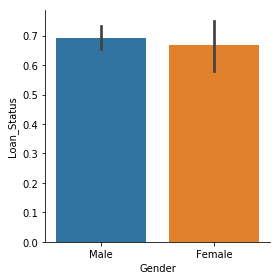

In [14]:
_ = sns.factorplot(x="Gender", y="Loan_Status", data=df, kind='bar')

## Marital Status

Next up: Marital Status. What effect does this have?

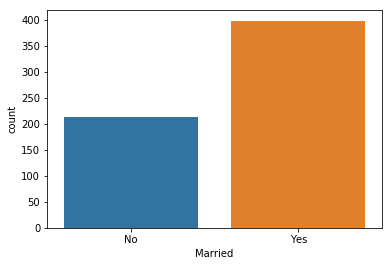

In [15]:
_ = sns.countplot(x=df['Married'])

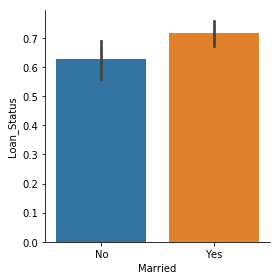

In [16]:
_ = sns.factorplot(x="Married", y="Loan_Status", data=df, kind='bar')

## Employee vs Freelance

What is the effect of employment type on loan acceptance?

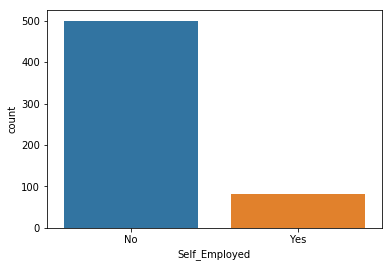

In [17]:
_ = sns.countplot(x=df['Self_Employed'])

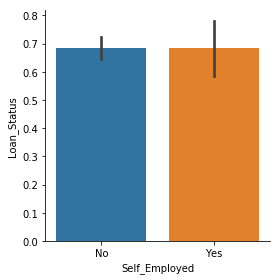

In [18]:
_ = sns.factorplot(x="Self_Employed", y="Loan_Status", data=df, kind='bar')

## Education

What is the effect of education on loan acceptance?

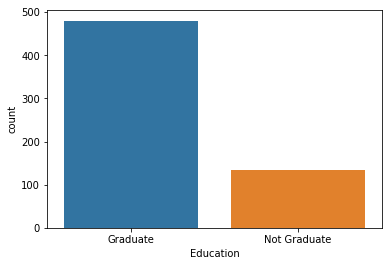

In [19]:
_ = sns.countplot(x=df['Education'])

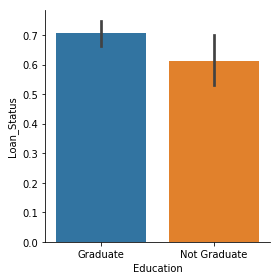

In [20]:
_ = sns.factorplot(x="Education", y="Loan_Status", data=df, kind='bar')

## Income and partner income

I'm curious about the effect of income and partner income on loan acceptance?

/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


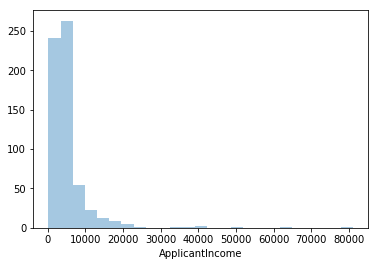

In [21]:
_ = sns.distplot(df['ApplicantIncome'], bins=25, kde=False)

/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


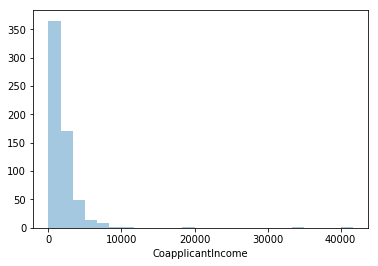

In [22]:
_ = sns.distplot(df['CoapplicantIncome'], bins=25, kde=False)

In [23]:
df['CombinedIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


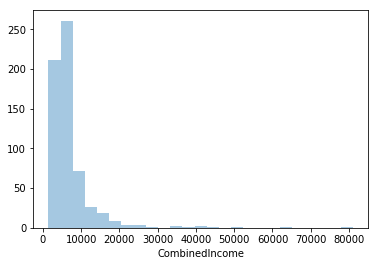

In [24]:
_ = sns.distplot(df['CombinedIncome'], bins=25, kde=False)

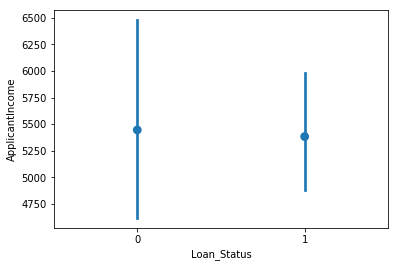

In [25]:
_ = sns.pointplot(x="Loan_Status", y="ApplicantIncome", data=df, join=False)

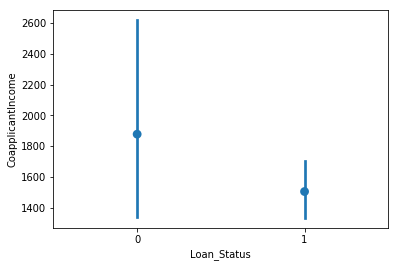

In [26]:
_ = sns.pointplot(x="Loan_Status", y="CoapplicantIncome", data=df, join=False)

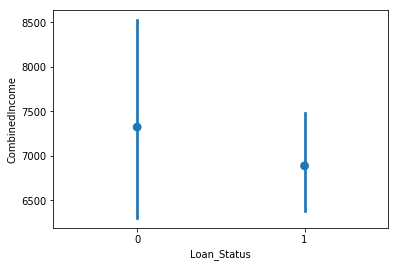

In [27]:
_ = sns.pointplot(x="Loan_Status", y="CombinedIncome", data=df, join=False)

## Property location

What is the effect of location of the property on loan acceptance?

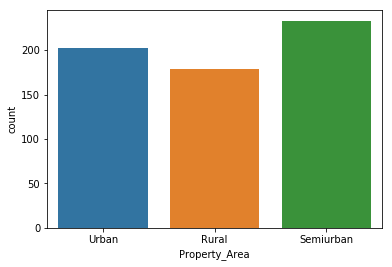

In [28]:
_ = sns.countplot(x=df['Property_Area'])

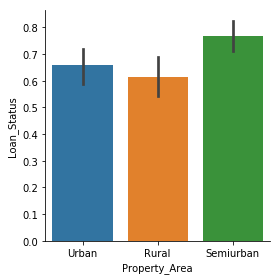

In [29]:
_ = sns.factorplot(x="Property_Area", y="Loan_Status", data=df, kind='bar')

## Credit history

How much do banks care about credit history?

/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


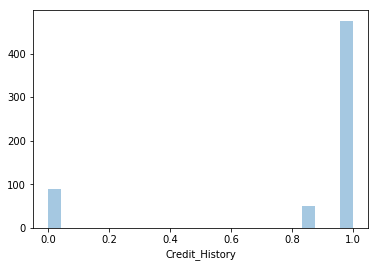

In [30]:
_ = sns.distplot(df['Credit_History'], kde=False)

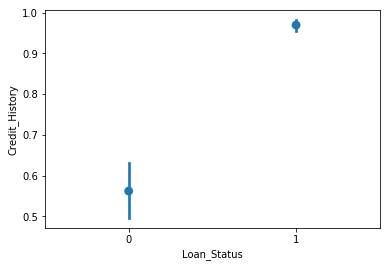

In [31]:
_ = sns.pointplot(x="Loan_Status", y="Credit_History", data=df, join=False)

## Loan Amount

Do banks approve lower or higher loans easier? What's the relation between loan amount and acceptance?

/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


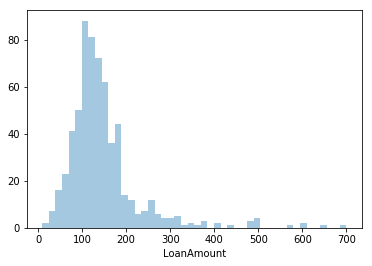

In [32]:
_ = sns.distplot(df['LoanAmount'], kde=False)

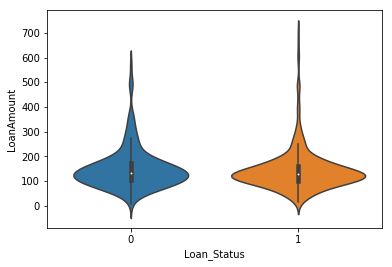

In [33]:
_ = sns.violinplot(x='Loan_Status', y='LoanAmount', data=df)

## Loan vs Salary

With a higher salary you might be able to loan more money more easily. Does this show from data?

In [34]:
df['LoanIncomeRatio'] = df['LoanAmount'] / df['CombinedIncome']

/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


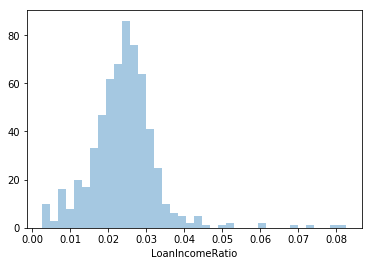

In [35]:
_ = sns.distplot(df['LoanIncomeRatio'], kde=False)

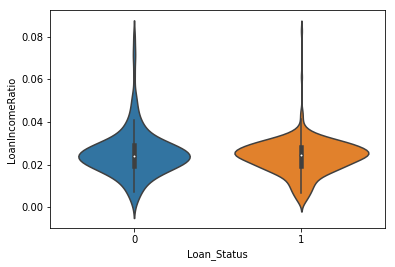

In [36]:
_ = sns.violinplot(x='Loan_Status', y='LoanIncomeRatio', data=df)

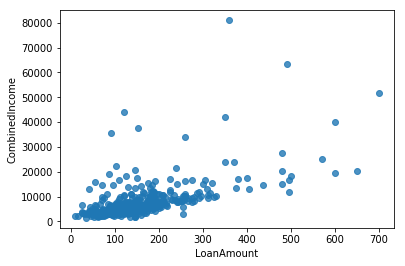

In [37]:
_ = sns.regplot(x='LoanAmount', y='CombinedIncome', data=df, fit_reg=False)

## Loan Status

Let's see how the target variable is distributed - what are we predicting?

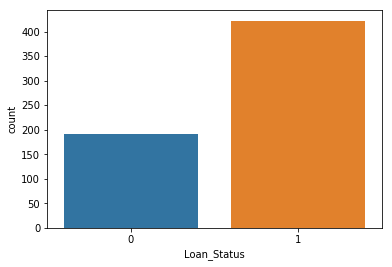

In [47]:
_ = sns.countplot(x=df['Loan_Status'])

## Preprocessing & feature engineering

Now we need to process the data to convert categorical to numbers etc..

In [39]:
df['Dependents'] = df['Dependents'].fillna(0.0)

In [42]:
from sklearn.preprocessing import LabelEncoder

df['Loan_Status'] = LabelEncoder().fit_transform(df['Loan_Status'])

In [40]:
df_enc = pd.get_dummies(df.drop(['Loan_Status'], axis=1), drop_first=True)

In [41]:
df_enc.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,CombinedIncome,LoanIncomeRatio,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,
LP001002,5849,0.0,146.412162,360.0,1.0,5849.0,0.025032,1,0,1,0,0,0,0,0,0,1
LP001003,4583,1508.0,128.000000,360.0,1.0,6091.0,0.021015,1,1,0,1,0,0,0,0,0,0
LP001005,3000,0.0,66.000000,360.0,1.0,3000.0,0.022000,1,1,1,0,0,0,0,1,0,1
LP001006,2583,2358.0,120.000000,360.0,1.0,4941.0,0.024287,1,1,1,0,0,0,1,0,0,1
LP001008,6000,0.0,141.000000,360.0,1.0,6000.0,0.023500,1,0,1,0,0,0,0,0,0,1


## Predictive modelling effort

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit

models = [
    LogisticRegression(),
    DecisionTreeClassifier(min_samples_split=10),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(),
    SVC(),
    NuSVC(),
    LinearSVC()
]

for model in models:
    scores = cross_val_score(model, df_enc, df['Loan_Status'].values, cv=StratifiedShuffleSplit())
    print("Score [{}]: {:.4f} (+/- {:.4f})".format(model.__class__.__name__, scores.mean(), scores.std()))

Score [LogisticRegression]: 0.8032 (+/- 0.0373)
Score [DecisionTreeClassifier]: 0.6806 (+/- 0.0337)
Score [RandomForestClassifier]: 0.7903 (+/- 0.0338)
Score [GradientBoostingClassifier]: 0.7968 (+/- 0.0272)
Score [SVC]: 0.6952 (+/- 0.0048)
Score [NuSVC]: 0.6984 (+/- 0.0074)
Score [LinearSVC]: 0.6161 (+/- 0.1548)


In [44]:
clf = GradientBoostingClassifier()
clf.fit(df_enc, df['Loan_Status'].values)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [45]:
df_feat_imp = pd.DataFrame({'coefs': clf.feature_importances_}, index=df_enc.columns)
df_feat_imp = df_feat_imp.sort_values(by='coefs', ascending=False)

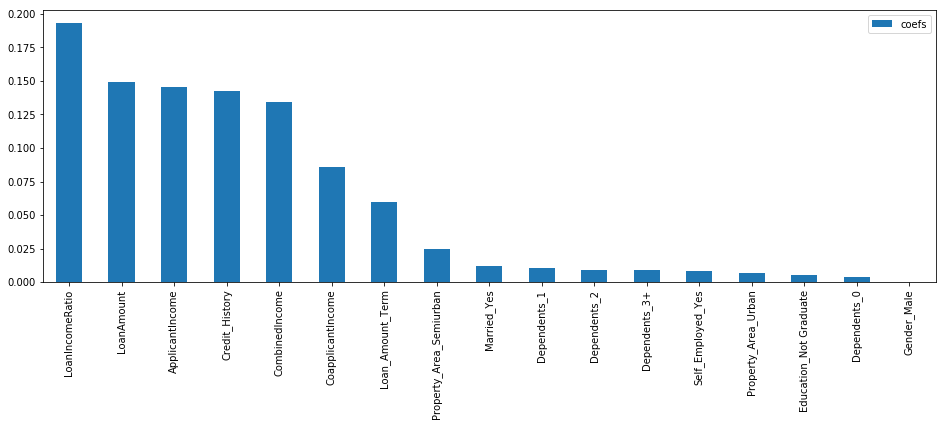

In [46]:
%matplotlib inline
_ = df_feat_imp.plot(kind='bar', figsize=(16, 5))